In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [1320]:
# THis is the function that adds a row to the summary, for every match and every failed check that appears. 
def flattening_list(list_dictionaries):
    dictionaries=[]
    for element in list_dictionaries:
        if isinstance(element,dict):
            dictionaries.append(element)
        if isinstance(element,dict)==False:
            for dictionary in element:
                dictionaries.append(dictionary)
        if element is None:
            pass
    return(dictionaries)
def add_to_summary_table( no_pago, valor_inicial, pago_capital ,intereses,valor_nuevo,pago_acumulado, pago_intereses_acum, pago_capital_acum): 
    no_pago_list=[]
    valor_inicial_list=[]
    pago_capital_list=[]
    intereses_list=[]
    valor_nuevo_list=[]
    pago_acumulado_list=[]
    pago_intereses_acum_list=[]
    pago_capital_acum_list=[]

    no_pago_list.append(no_pago)
    valor_inicial_list.append(valor_inicial)
    pago_capital_list.append(pago_capital)
    intereses_list.append(intereses)
    valor_nuevo_list.append(valor_nuevo)
    pago_acumulado_list.append(pago_acumulado)
    pago_intereses_acum_list.append(pago_intereses_acum)
    pago_capital_acum_list.append(pago_capital_acum)


    failed_checks_dict= {'periodo':no_pago_list
                         ,'saldo_inicial':valor_inicial_list
                        ,'pago_capital': pago_capital_list
                        ,'intereses':intereses_list
                        ,'saldo_final':valor_nuevo_list
                        , 'pago_acumulado':pago_acumulado_list
                        ,'pago_intereses_acum':pago_intereses_acum_list
                        ,'pago_capital_acum':pago_capital_acum_list}
    return(failed_checks_dict) #dictionary with match failed checks

def dictionaries_joining(dictionaries): #Joins the failed_df dictionaries and converts it to a dataframe.
    for num in range(0,len(dictionaries)-1):
        # print(num)
        for key in dictionaries[0]:
            if key in dictionaries[num+1]:
                for value in dictionaries[num+1][key]:
                    dictionaries[0][key] += [value]
    dict_df=dictionaries[0]#pd.DataFrame(dictionaries[0])
    return(dict_df)  

In [1353]:
# no_cantidad_pago=0
# for meses in periodos_pagos:
#     pago_mensual[no_cantidad_pago]
def ciclo_amortizacion(valor_inicial, tasa, pago_mensual, meses, mes_inicial, pago_acumulado=0, pago_intereses_acum=0, pago_capital_acum=0):
#     pago_acumulado= 0
#     pago_intereses_acum=0
#     pago_capital_acum=0
    table_dict=[]
    periods=[]
    valor_nuevo=valor_inicial
    for no_pago in range (mes_inicial,meses): # meses
        periods.append(no_pago)
        pago_acumulado+=pago_mensual
        valor_inicial= round(valor_nuevo,2)
        intereses= round(((valor_inicial)*(tasa)),2)
        pago_intereses_acum+=intereses
        valor_c_intereses =round(valor_inicial + intereses,2)
        pago_capital= round(pago_mensual- intereses,2)
        pago_capital_acum+= pago_capital
        valor_nuevo= round(valor_c_intereses - pago_mensual,2)
        table_dict.append(add_to_summary_table(no_pago, valor_inicial, pago_capital ,intereses,valor_nuevo,pago_acumulado, pago_intereses_acum, pago_capital_acum))

        if valor_nuevo<=0:
            print('Pago terminado en periodo ',no_pago/12 )
            amortizacion_df=pd.DataFrame(dictionaries_joining(table_dict))
            amortizacion_df.loc[:,'eficiencia']=amortizacion_df['pago_capital']/(amortizacion_df['pago_capital']+amortizacion_df['intereses'])
            return(amortizacion_df,periods)
#         elif no_pago==meses:
    print('Pago terminado en periodo ',no_pago/12 )
    amortizacion_df=pd.DataFrame(dictionaries_joining(table_dict))
    amortizacion_df.loc[:,'eficiencia']=amortizacion_df['pago_capital']/(amortizacion_df['pago_capital']+amortizacion_df['intereses'])
    return(amortizacion_df,periods)
            

In [1354]:
tasa_equivalente_anual= .1010 #.85 # para lo del TEC
tasa_equivalente_mensual = ((1+tasa_equivalente_anual)**(1/12))-1
tasa_equivalente_mensual

0.008050470307310986

In [1355]:
valor_inicial= 410332
tasa=tasa_equivalente_mensual 
pago_mensual= 4800+6000#+1200#*2#4734*2
pagos_extras = 350
seguros= 0
meses=12*19

In [1356]:
amortizacion_df, periods = ciclo_amortizacion(valor_inicial, tasa, pago_mensual,meses,1)

Pago terminado en periodo  3.8333333333333335


In [1357]:
pago_capital_inicial=16574
pago_capital_inicial/(3291+pago_capital_inicial)

0.8343317392398691

In [1358]:
16574/(.834)

19872.901678657076

In [1359]:

amortizacion_df

,periodo,saldo_inicial,pago_capital,intereses,saldo_final,pago_acumulado,pago_intereses_acum,pago_capital_acum,eficiencia
0,1,410332.00,7496.63,3303.37,402835.37,10800,3303.37,7496.63,0.694132
1,2,402835.37,7556.99,3243.01,395278.38,21600,6546.38,15053.62,0.699721
2,3,395278.38,7617.82,3182.18,387660.56,32400,9728.56,22671.44,0.705354
3,4,387660.56,7679.15,3120.85,379981.41,43200,12849.41,30350.59,0.711032
4,5,379981.41,7740.97,3059.03,372240.44,54000,15908.44,38091.56,0.716756
5,6,372240.44,7803.29,2996.71,364437.15,64800,18905.15,45894.85,0.722527
6,7,364437.15,7866.11,2933.89,356571.04,75600,21839.04,53760.96,0.728344
7,8,356571.04,7929.44,2870.56,348641.60,86400,24709.60,61690.40,0.734207
8,9,348641.60,7993.27,2806.73,340648.33,97200,27516.33,69683.67,0.740118
9,10,340648.33,8057.62,2742.38,332590.71,108000,30258.71,77741.29,0.746076


### Eficiencia total de amortización

In [1360]:
def eficiencia_total(amortizacion_df):
    return(amortizacion_df['pago_capital_acum'].iloc[-1]/(amortizacion_df['pago_capital_acum'].iloc[-1]+amortizacion_df['pago_intereses_acum'].iloc[-1]))

eficiencia_total(amortizacion_df)

0.8360872785829307

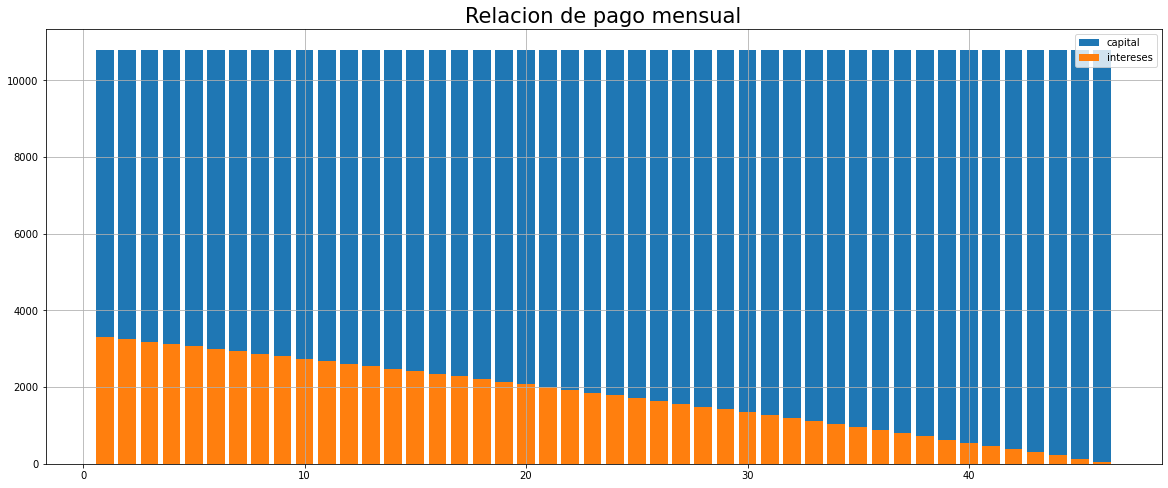

In [1361]:
def grafica_eficiencia_mensual(periods, amortizacion_df):
    fig, ax = plt.subplots(figsize=(20,8))

    
    ax.bar(periods, amortizacion_df['pago_capital'], bottom=amortizacion_df['intereses'], label='capital')
    ax.bar(periods, amortizacion_df['intereses'], label='intereses')

    ax.set_title('Relacion de pago mensual', fontsize=21)
    ax.grid()
    ax.legend()
grafica_eficiencia_mensual(periods, amortizacion_df)

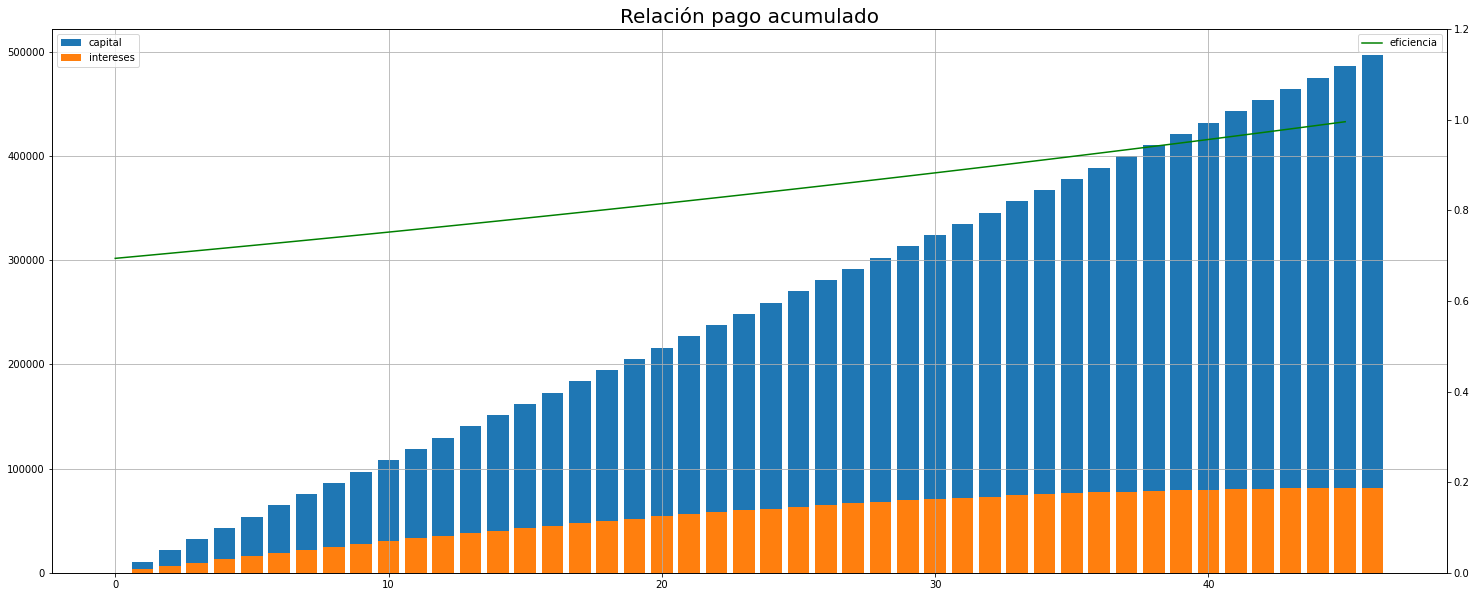

In [1362]:
def grafica_pago_acumulado(periods, amortizacion_df):
    fig, ax = plt.subplots(figsize=(25,10))
    ax.bar(periods, amortizacion_df['pago_capital_acum'],bottom= amortizacion_df['pago_intereses_acum'],label='capital')
    ax.bar(periods, amortizacion_df['pago_intereses_acum'], label='intereses')

    ax2= ax.twinx()
    ax2.plot(amortizacion_df['eficiencia'],'g-', label='eficiencia')


    ax.set_title('Relación pago acumulado', fontsize=20)
    ax.legend()
    ax2.legend()
    ax.grid()
    ax2.set_ylim(0,1.2)

    
grafica_pago_acumulado(periods, amortizacion_df)

In [1363]:
len(periods)

46

In [1364]:
len(dictionary_heo.keys())

8

In [1365]:
779.10/115803.71

0.006727763730540239

In [1366]:
802.35/115400.09

0.006952767541169163

# Con pago variable 

In [1367]:
# valor_inicial=115803.71#+817.55#-2186.68
# tasa=.006950
# pago_mensual_list=[500,3004.23]
# periodos_pagos=[6,60]
# # años=13
# # for i in range(13*12):
# #     periodos_pagos.append(i)
# seguros= 0
valor_inicial= 410332
tasa=tasa_equivalente_mensual 
pago_mensual_list=[4800+6000,4800]#+6000#+1200#*2#4734*2
periodos_pagos=[12*3,12*8]
# for i in range(13*12):
#     periodos_pagos.append(i)
pagos_extras = 350
seguros= 0
meses=12*13

In [1368]:
no_cantidad_pago=0
df_periodos=[]
periodos=[]
mes_inicial=1
pago_acumulado=0
pago_intereses_acum=0
pago_capital_acum=0
for meses in periodos_pagos:
    pago_mensual = pago_mensual_list[no_cantidad_pago]
    no_cantidad_pago+=1
    print(no_cantidad_pago)
    print(pago_acumulado)
    df, periods=ciclo_amortizacion(valor_inicial, tasa, pago_mensual, meses+1,mes_inicial, pago_acumulado, pago_intereses_acum, pago_capital_acum )
    df_periodos.append(df)
    periodos.append(periods)
    pago_acumulado=df['pago_acumulado'].iloc[-1]
    pago_intereses_acum=df['pago_intereses_acum'].iloc[-1]
    pago_capital_acum=df['pago_capital_acum'].iloc[-1]
    mes_inicial= periods[-1]+1
    valor_inicial =df_periodos[0].iloc[-1]['saldo_final']

1
0
Pago terminado en periodo  3.0
2
388800
Pago terminado en periodo  4.916666666666667


In [1369]:
df_meses_diferentes=pd.concat(df_periodos)
df_meses_diferentes.reset_index(inplace=True)

In [1375]:
df_meses_diferentes

,index,periodo,saldo_inicial,pago_capital,intereses,saldo_final,pago_acumulado,pago_intereses_acum,pago_capital_acum,eficiencia
0,0,1,410332.00,7496.63,3303.37,402835.37,10800,3303.37,7496.63,0.694132
1,1,2,402835.37,7556.99,3243.01,395278.38,21600,6546.38,15053.62,0.699721
2,2,3,395278.38,7617.82,3182.18,387660.56,32400,9728.56,22671.44,0.705354
3,3,4,387660.56,7679.15,3120.85,379981.41,43200,12849.41,30350.59,0.711032
4,4,5,379981.41,7740.97,3059.03,372240.44,54000,15908.44,38091.56,0.716756
5,5,6,372240.44,7803.29,2996.71,364437.15,64800,18905.15,45894.85,0.722527
6,6,7,364437.15,7866.11,2933.89,356571.04,75600,21839.04,53760.96,0.728344
7,7,8,356571.04,7929.44,2870.56,348641.60,86400,24709.60,61690.40,0.734207
8,8,9,348641.60,7993.27,2806.73,340648.33,97200,27516.33,69683.67,0.740118
9,9,10,340648.33,8057.62,2742.38,332590.71,108000,30258.71,77741.29,0.746076


In [1376]:
import itertools
periods=list(itertools.chain.from_iterable(periodos))

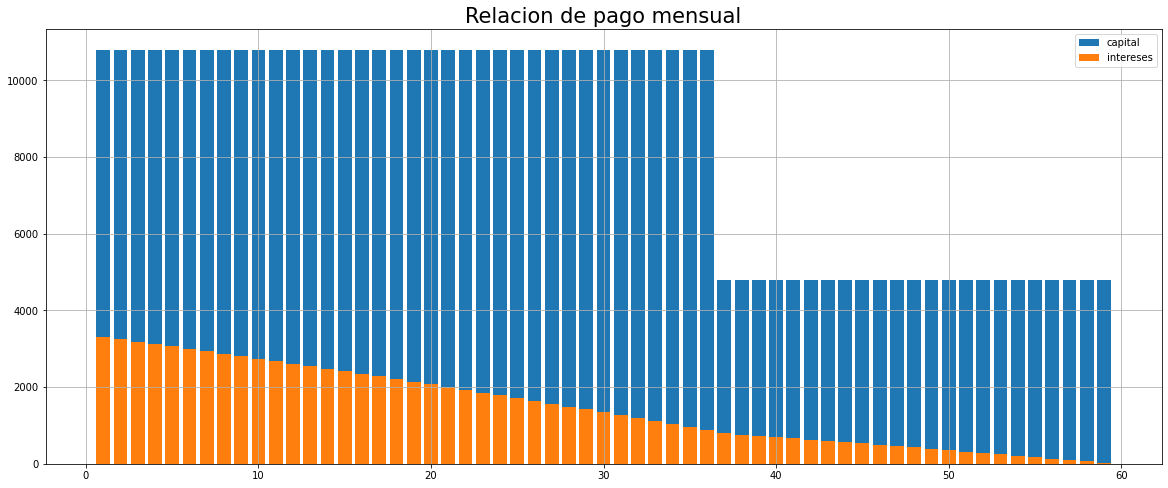

In [1377]:
grafica_eficiencia_mensual(periods, df_meses_diferentes)

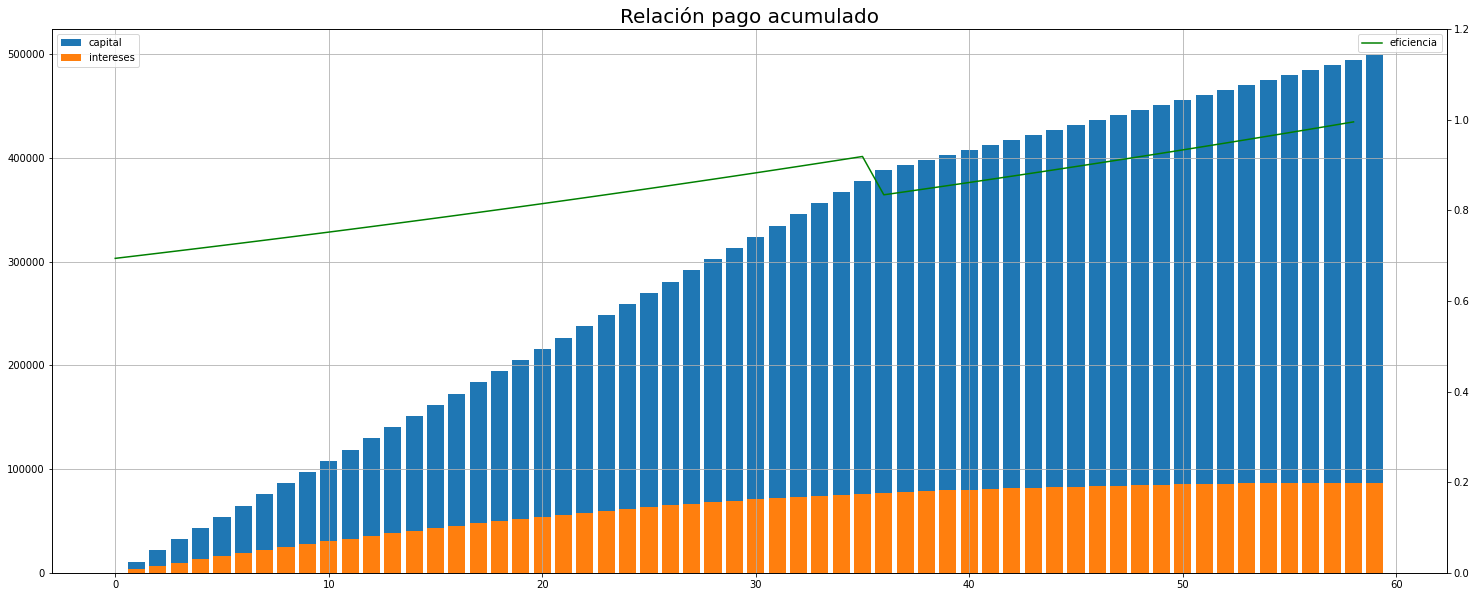

In [1378]:
grafica_pago_acumulado(periods, df_meses_diferentes)

In [1379]:
eficiencia_total(df_meses_diferentes)

0.8260608573717949

# Con eficiencia fija

In [1380]:
valor_inicial=410332#115803.71#+817.55#-2186.68
tasa=.006950
pago_mensual_list=[500,3004.23]
# periodos_pagos=[6,60]
años=13
# for i in range(20*12):
#     periodos_pagos.append(i)
seguros= 0

In [1381]:
no_cantidad_pago=0
df_periodos=[]
periodos=[]
mes_inicial=1
for meses in periodos_pagos:
    pago_mensual = pago_mensual_list[no_cantidad_pago]
    no_cantidad_pago+=1
    print(no_cantidad_pago)
    df, periods=ciclo_amortizacion(valor_inicial, tasa, pago_mensual, meses+1,mes_inicial )
    df_periodos.append(df)
    periodos.append(periods)
    mes_inicial= periods[-1]+1
    valor_inicial =df_periodos[0].iloc[-1]['saldo_final']

1
Pago terminado en periodo  3.0
2
Pago terminado en periodo  8.0


IndexError: list index out of range

## Fórmula que tal vez puede sustituir al ciclo de amortización simple

In [1382]:
valor_inicial= 410332
tasa=tasa_equivalente_mensual 
pago_mensual= 4734#+6000#+1200#*2#4734*2
pagos_extras = 350
seguros= 0
meses=12*13

In [1383]:
eficiencia=.833
# valor_final= valor_inicial*((1-(1/eficiencia)+tasa)/(1-(1/eficiencia)))
# valor_inicial-valor_final
pago_acumulado=0
pago_intereses_acum=0
pago_capital_acum=0
table_dict=[]
periods=[]
for no_pago in range(meses):
    periods.append(no_pago)
    valor_nuevo= round(valor_inicial*((-1+(1/eficiencia)-tasa)/(-1+(1/eficiencia))),2)
    pago_capital= round(valor_inicial-valor_nuevo,2)
    intereses= round(valor_inicial* tasa,2)
    pago_total=round(pago_capital+intereses,2)
    pago_acumulado+=(pago_total)
    pago_capital_acum+=pago_capital
    pago_intereses_acum+=intereses
    valor_inicial=round(valor_nuevo,2)
    table_dict.append(add_to_summary_table(no_pago, valor_inicial, pago_capital ,intereses,valor_nuevo,pago_acumulado, pago_intereses_acum, pago_capital_acum))

    if pago_total<=4800:
        print('Pago terminado en año ',no_pago/12 )
        amortizacion_eficiencia_fija=pd.DataFrame(dictionaries_joining(table_dict))
        amortizacion_eficiencia_fija.loc[:,'eficiencia']=amortizacion_eficiencia_fija['pago_capital']/(amortizacion_eficiencia_fija['pago_capital']+amortizacion_eficiencia_fija['intereses'])
        break
#         return(amortizacion_df,periods)
#         elif no_pago==meses:
# print('Pago terminado en periodo ',i/12 )
# amortizacion_df=pd.DataFrame(dictionaries_joining(table_dict))
# amortizacion_df.loc[:,'eficiencia']=amortizacion_df['pago_capital']/(amortizacion_df['pago_capital']+amortizacion_df['intereses'])
# pago_total

Pago terminado en año  2.9166666666666665


In [1384]:
amortizacion_eficiencia_fija

,periodo,saldo_inicial,pago_capital,intereses,saldo_final,pago_acumulado,pago_intereses_acum,pago_capital_acum,eficiencia
0,0,393854.73,16477.27,3303.37,393854.73,19780.64,3303.37,16477.27,0.833000
1,1,378039.12,15815.61,3170.72,378039.12,38766.97,6474.09,32292.88,0.833000
2,2,362858.60,15180.52,3043.39,362858.60,56990.88,9517.48,47473.40,0.833000
3,3,348287.67,14570.93,2921.18,348287.67,74482.99,12438.66,62044.33,0.833000
4,4,334301.85,13985.82,2803.88,334301.85,91272.69,15242.54,76030.15,0.833000
5,5,320877.65,13424.20,2691.29,320877.65,107388.18,17933.83,89454.35,0.833000
6,6,307992.51,12885.14,2583.22,307992.51,122856.54,20517.05,102339.49,0.833000
7,7,295624.78,12367.73,2479.48,295624.78,137703.75,22996.53,114707.22,0.833000
8,8,283753.69,11871.09,2379.92,283753.69,151954.76,25376.45,126578.31,0.833000
9,9,272359.29,11394.40,2284.35,272359.29,165633.51,27660.80,137972.71,0.833000


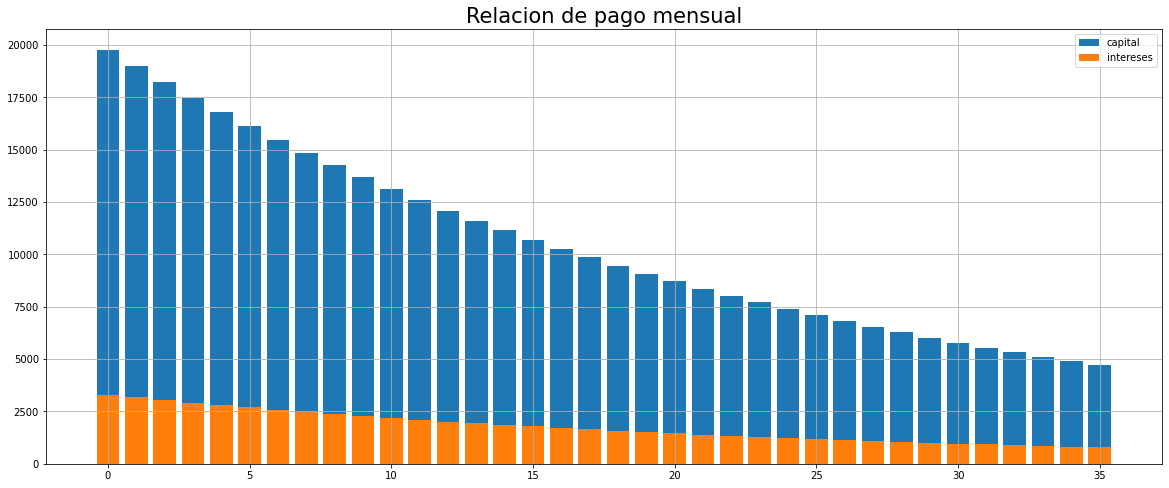

In [1385]:
grafica_eficiencia_mensual(periods, amortizacion_eficiencia_fija)

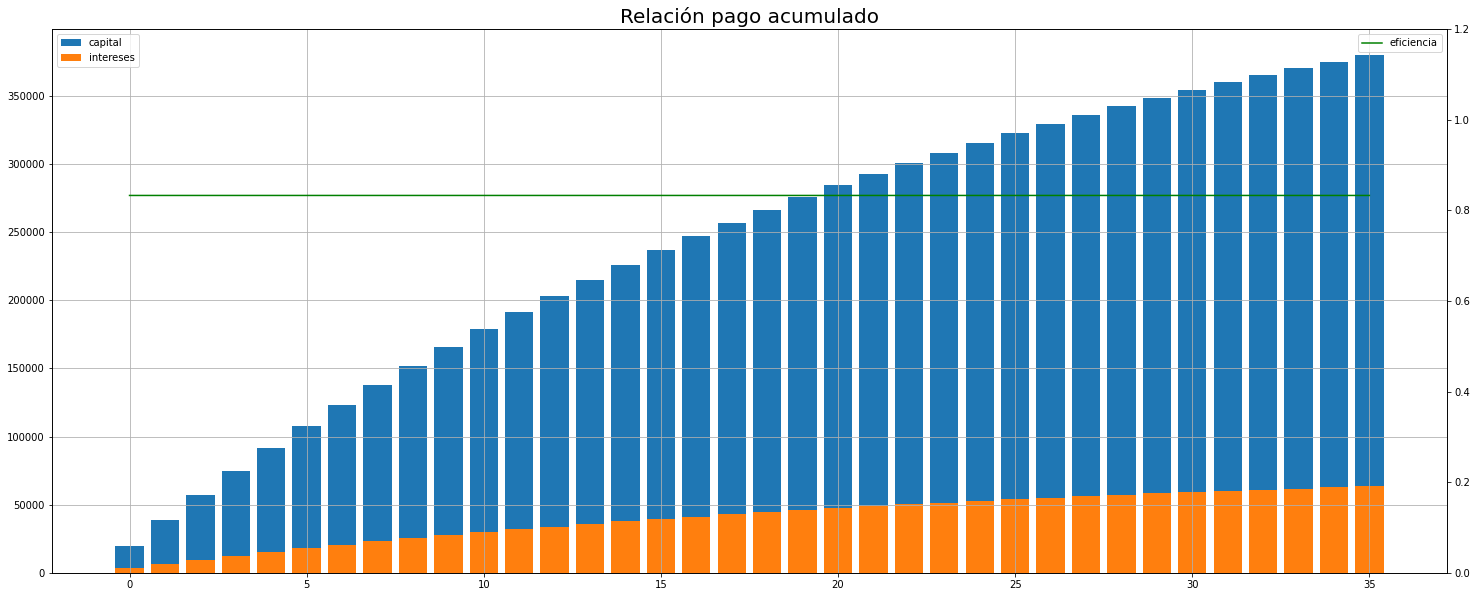

In [1386]:
grafica_pago_acumulado(periods, amortizacion_eficiencia_fija)